In [0]:
from fastai import *
from fastai.vision import *

#load the dataset

In [2]:
path=untar_data(URLs.MNIST);
path

PosixPath('/root/.fastai/data/mnist_png')

In [3]:
path.ls()

[PosixPath('/root/.fastai/data/mnist_png/training'),
 PosixPath('/root/.fastai/data/mnist_png/testing')]

In [0]:
tfms=get_transforms(do_flip=False)
data=ImageDataBunch.from_folder(path,train='training',valid='training',ds_tfms=tfms,size=26)

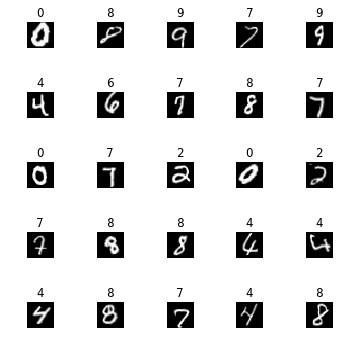

In [5]:
data.show_batch(rows=5,figsize=(5,5))

In [6]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

In [7]:
#Resnet34
#creating our model
models


<module 'fastai.vision.models' from '/usr/local/lib/python3.6/dist-packages/fastai/vision/models/__init__.py'>

In [8]:
learn=cnn_learner(data,models.resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 106528489.13it/s]


In [9]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [22]:
#Train the model for 5 iterations and save it
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.132278,0.057589,0.017667,02:59
1,0.124142,0.048005,0.014783,02:58
2,0.100896,0.037428,0.011833,02:56
3,0.083932,0.037144,0.011450,02:55


In [23]:
#Seems good but still lets Analyze results
interpret=ClassificationInterpretation.from_learner(learn)
losses,indices=interpret.top_losses()
len(data.valid_ds)==len(losses)==len(indices)

True

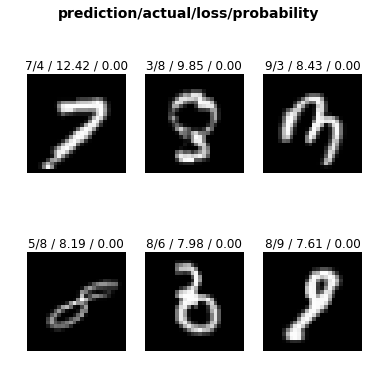

In [24]:
#show top losses 
interpret.plot_top_losses(6,figsize=(6,6))

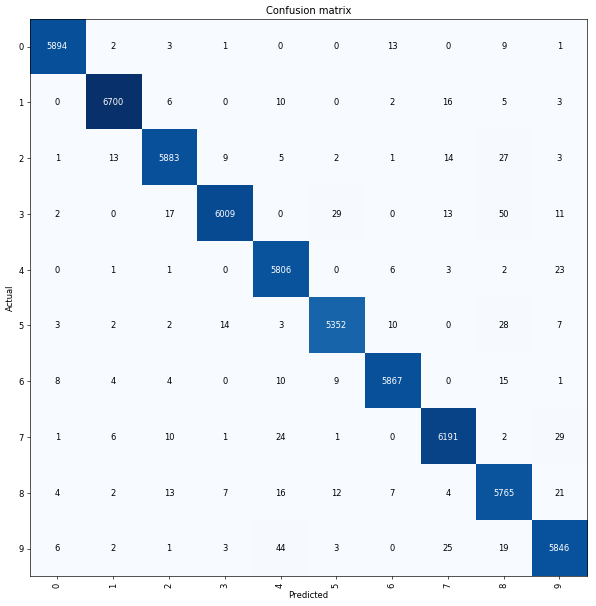

In [25]:
interpret.plot_confusion_matrix(figsize=(10,10),dpi=60)

In [26]:
interpret.most_confused(min_val=10)

[('3', '8', 50),
 ('9', '4', 44),
 ('3', '5', 29),
 ('7', '9', 29),
 ('5', '8', 28),
 ('2', '8', 27),
 ('9', '7', 25),
 ('7', '4', 24),
 ('4', '9', 23),
 ('8', '9', 21),
 ('9', '8', 19),
 ('3', '2', 17),
 ('1', '7', 16),
 ('8', '4', 16),
 ('6', '8', 15),
 ('2', '7', 14),
 ('5', '3', 14),
 ('0', '6', 13),
 ('2', '1', 13),
 ('3', '7', 13),
 ('8', '2', 13),
 ('8', '5', 12),
 ('3', '9', 11),
 ('1', '4', 10),
 ('5', '6', 10),
 ('6', '4', 10),
 ('7', '2', 10)]

In [0]:
#let see if we can improve the same
learn.save('stage-1')


In [28]:
#tune the model with applied learning rate
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.086267,0.052049,0.015933,03:06
1,0.033826,0.013183,0.003883,03:05


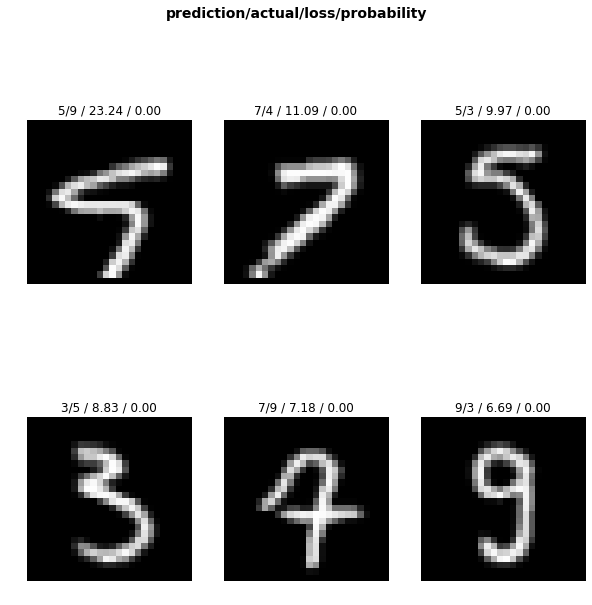

In [29]:
interpret=ClassificationInterpretation.from_learner(learn)
interpret.plot_top_losses(6,figsize=(10,10))

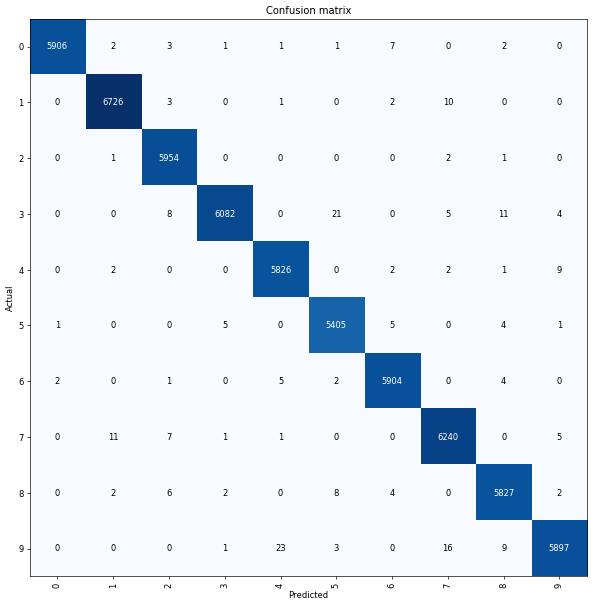

In [30]:
interpret.plot_confusion_matrix(figsize=(10,10),dpi=60)

In [33]:
interpret.most_confused(min_val=2)

[('9', '4', 23),
 ('3', '5', 21),
 ('9', '7', 16),
 ('3', '8', 11),
 ('7', '1', 11),
 ('1', '7', 10),
 ('4', '9', 9),
 ('9', '8', 9),
 ('3', '2', 8),
 ('8', '5', 8),
 ('0', '6', 7),
 ('7', '2', 7),
 ('8', '2', 6),
 ('3', '7', 5),
 ('5', '3', 5),
 ('5', '6', 5),
 ('6', '4', 5),
 ('7', '9', 5),
 ('3', '9', 4),
 ('5', '8', 4),
 ('6', '8', 4),
 ('8', '6', 4),
 ('0', '2', 3),
 ('1', '2', 3),
 ('9', '5', 3),
 ('0', '1', 2),
 ('0', '8', 2),
 ('1', '6', 2),
 ('2', '7', 2),
 ('4', '1', 2),
 ('4', '6', 2),
 ('4', '7', 2),
 ('6', '0', 2),
 ('6', '5', 2),
 ('8', '1', 2),
 ('8', '3', 2),
 ('8', '9', 2)]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


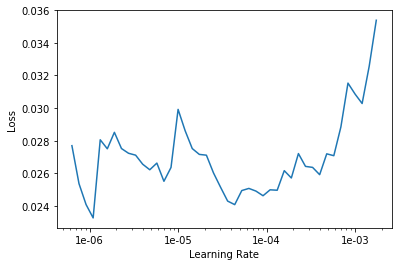

In [34]:
#Find the learning rate
learn.lr_find()
learn.recorder.plot()

In [35]:
learn.load('stage-1')
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.077379,0.031622,0.009867,03:12
1,0.048283,0.017215,0.005400,03:12


In [0]:
#Six top losses


interpret = ClassificationInterpretation.from_learner(learn)
interpret.plot_top_losses(6,figsize=(10,10))

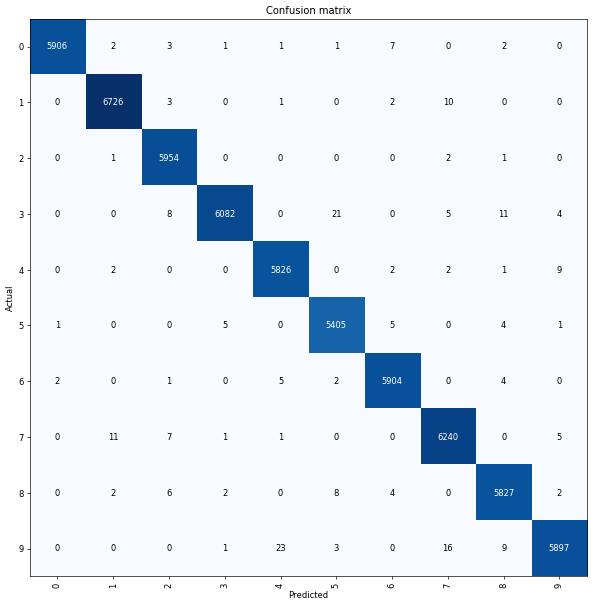

In [36]:
interpret.plot_confusion_matrix(figsize=(10,10), dpi=60)

In [42]:
learn1=cnn_learner(data,models.vgg16_bn,metrics=error_rate)
learn1.fit_one_cycle(4)
learn1.save('Vgg16_mn_1')

epoch,train_loss,valid_loss,error_rate,time
0,0.737334,0.382083,0.111867,02:45
1,0.287821,0.116787,0.035600,02:44
2,0.199370,0.073275,0.022233,02:42
3,0.162425,0.067928,0.020933,02:45


In [0]:
interpret2=ClassificationInterpretation.from_learner(learn1)


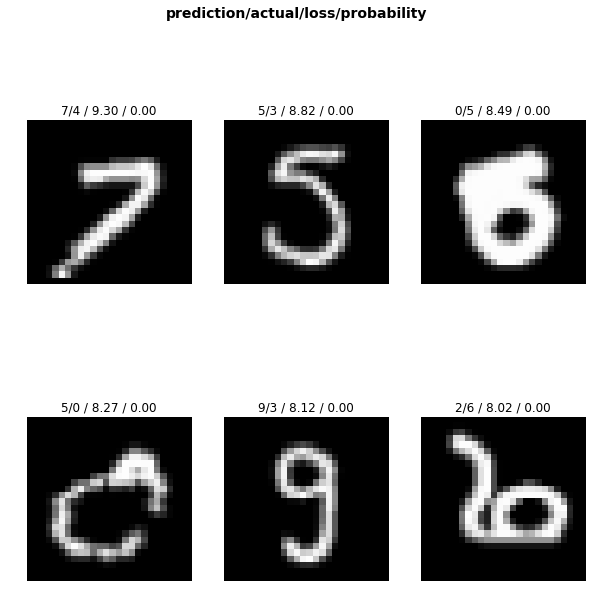

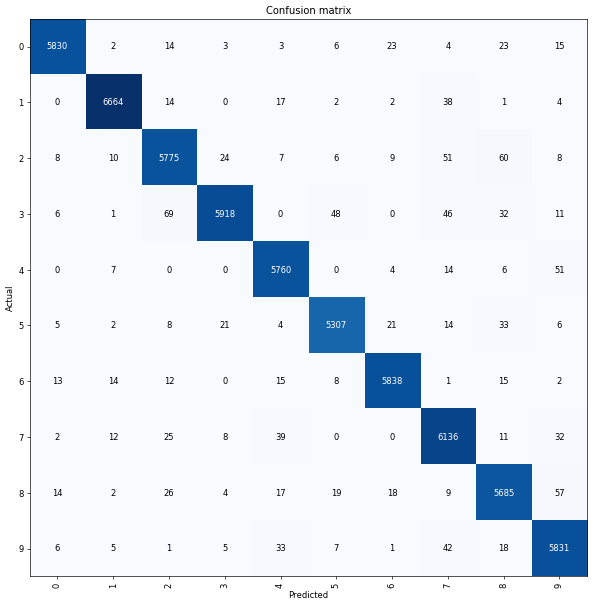

In [44]:
interpret2.plot_top_losses(6,figsize=(10,10))
interpret2.most_confused(min_val=4)
interpret2.plot_confusion_matrix(figsize=(10,10),dpi=60)

# Lets try a learning rate

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


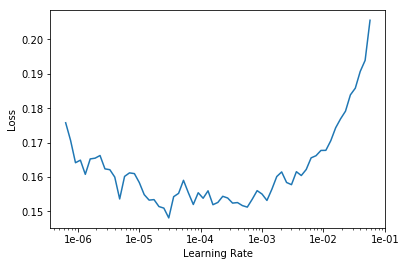

In [46]:
learn1.load('Vgg16_mn_1')
learn1.lr_find()
learn1.recorder.plot()

In [48]:
learn1.unfreeze()
learn1.fit_one_cycle(2,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.082428,0.025486,0.007400,02:52
1,0.050738,0.018786,0.005700,02:52


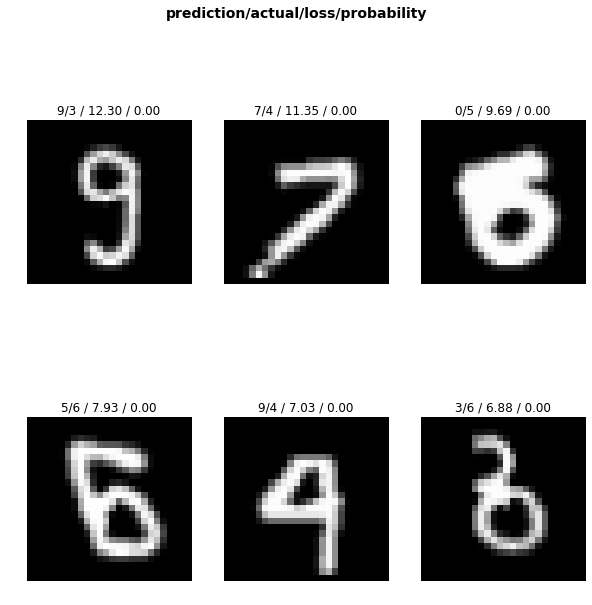

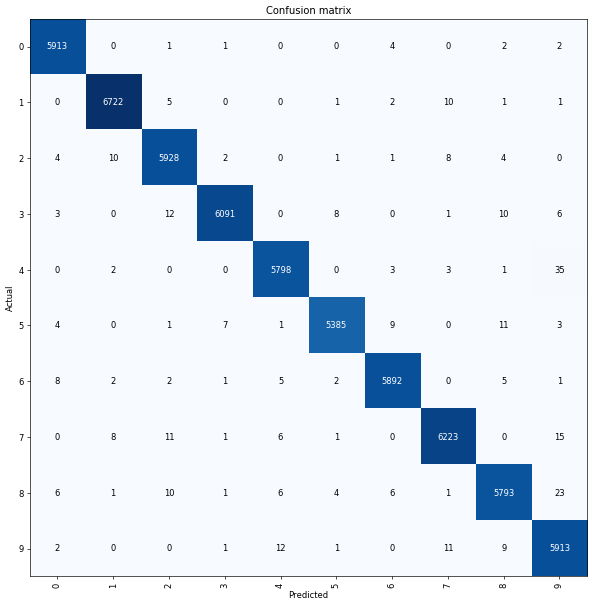

In [49]:
interpret1=ClassificationInterpretation.from_learner(learn1)
interpret1.plot_top_losses(6,figsize=(10,10))
interpret1.most_confused(min_val=4)
interpret1.plot_confusion_matrix(figsize=(10,10),dpi=60)

In [50]:
interpret1.most_confused(min_val=2)

[('4', '9', 35),
 ('8', '9', 23),
 ('7', '9', 15),
 ('3', '2', 12),
 ('9', '4', 12),
 ('5', '8', 11),
 ('7', '2', 11),
 ('9', '7', 11),
 ('1', '7', 10),
 ('2', '1', 10),
 ('3', '8', 10),
 ('8', '2', 10),
 ('5', '6', 9),
 ('9', '8', 9),
 ('2', '7', 8),
 ('3', '5', 8),
 ('6', '0', 8),
 ('7', '1', 8),
 ('5', '3', 7),
 ('3', '9', 6),
 ('7', '4', 6),
 ('8', '0', 6),
 ('8', '4', 6),
 ('8', '6', 6),
 ('1', '2', 5),
 ('6', '4', 5),
 ('6', '8', 5),
 ('0', '6', 4),
 ('2', '0', 4),
 ('2', '8', 4),
 ('5', '0', 4),
 ('8', '5', 4),
 ('3', '0', 3),
 ('4', '6', 3),
 ('4', '7', 3),
 ('5', '9', 3),
 ('0', '8', 2),
 ('0', '9', 2),
 ('1', '6', 2),
 ('2', '3', 2),
 ('4', '1', 2),
 ('6', '1', 2),
 ('6', '2', 2),
 ('6', '5', 2),
 ('9', '0', 2)]